In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import openpyxl

In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
import os

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="/content/drive/MyDrive/Dataset/Data",
    labels="inferred",
    label_mode="int",
    class_names=["COV", "NORM"],
    batch_size=14, # Prev 32
    image_size=(299, 299),
    shuffle=True,
    seed=42,
)

Found 7252 files belonging to 2 classes.


In [ ]:
DATASET_SIZE = 518 # Prev 227

train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

In [ ]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     directory="/content/drive/MyDrive/Dataset/Data",
#     labels="inferred",
#     label_mode="int",
#     class_names=["COV", "NORM"],
#     batch_size=32,
#     image_size=(299, 299),
#     shuffle=True,
#     seed=42,
# )

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(299, 299, 3))) # Write 1 instead of 3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(256, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 128)       0

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu')) # Was 128
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu')) # Was 64
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 128)       0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs=15)

Epoch 1/15
362/362 [==============================] - 853s 2s/step - loss: 1.5761 - accuracy: 0.7204 - val_loss: 0.4022 - val_accuracy: 0.8210
Epoch 2/15
362/362 [==============================] - 45s 123ms/step - loss: 0.3497 - accuracy: 0.8662 - val_loss: 0.2585 - val_accuracy: 0.8996
Epoch 3/15
362/362 [==============================] - 45s 123ms/step - loss: 0.2510 - accuracy: 0.9039 - val_loss: 0.2044 - val_accuracy: 0.9186
Epoch 4/15
362/362 [==============================] - 44s 122ms/step - loss: 0.1818 - accuracy: 0.9315 - val_loss: 0.2460 - val_accuracy: 0.9259
Epoch 5/15
362/362 [==============================] - 44s 120ms/step - loss: 0.1803 - accuracy: 0.9365 - val_loss: 0.2488 - val_accuracy: 0.9105
Epoch 6/15
362/362 [==============================] - 45s 124ms/step - loss: 0.1758 - accuracy: 0.9367 - val_loss: 0.2744 - val_accuracy: 0.9195
Epoch 7/15
362/362 [==============================] - 44s 121ms/step - loss: 0.3405 - accuracy: 0.8747 - val_loss: 0.2689 - val_accu

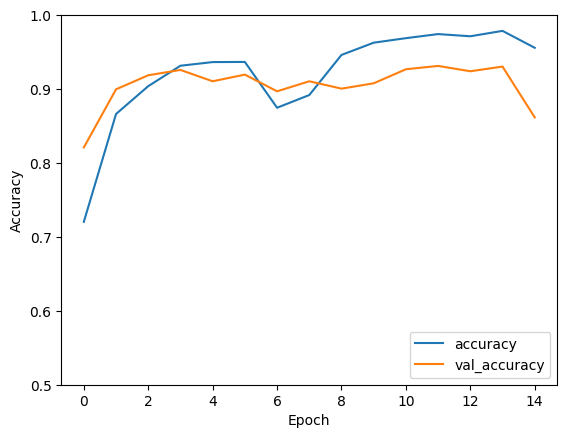

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Accuracy = TP+TN / Total

In [ ]:
loss, accuracy= model.evaluate(test_dataset, verbose=2)

print(f'loss = {loss}')
print(f'accuracy = {accuracy}')

77/77 - 17s - loss: 0.3320 - accuracy: 0.8785 - 17s/epoch - 218ms/step
loss = 0.3320445418357849
accuracy = 0.8784786462783813


COVID 19 Dataset
Tiny ML
Tensorflow Lite
Mobile App
Web App
Multiclass classification(Pne, TB)
use CT




In [ ]:
PATH = "/content/drive/MyDrive/ML_Model/model.tflite"
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the model.
with open(PATH, 'wb') as f:
  f.write(tflite_model)
